<a href="https://colab.research.google.com/github/annieisok/Cats-vs-Dogs-Classification/blob/main/cats_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:08<00:00, 200MB/s]
100% 1.06G/1.06G [00:08<00:00, 133MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()
# to unzip the zip file & show its content

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
#from keras website... we r giving inputs
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256) #bcos each of the images needs to be made of same size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 103ms/step - loss: 1.3480 - accuracy: 0.5935 - val_loss: 0.6953 - val_accuracy: 0.6114
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5774 - accuracy: 0.6976 - val_loss: 0.5405 - val_accuracy: 0.7292
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4939 - accuracy: 0.7646 - val_loss: 1.3713 - val_accuracy: 0.5010
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4221 - accuracy: 0.8099 - val_loss: 0.5910 - val_accuracy: 0.7392
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3619 - accuracy: 0.8431 - val_loss: 0.5427 - val_accuracy: 0.7444
Epoch 6/10
625/625 [==============================] - 69s 111ms/step - loss: 0.2822 - accuracy: 0.8832 - val_loss: 0.5033 - val_accuracy: 0.7764
Epoch 7/10
625/625 [==============================] - 78s 125ms/step - loss: 0.1968 - accuracy: 0.9212 - val_loss: 0.8726 - val_ac

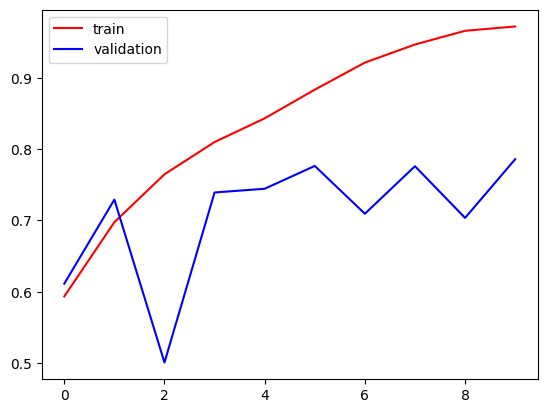

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

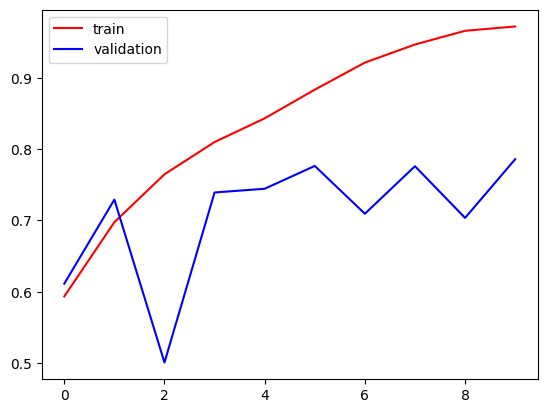

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

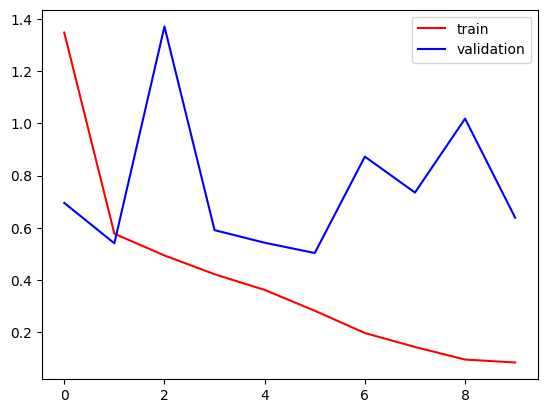

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

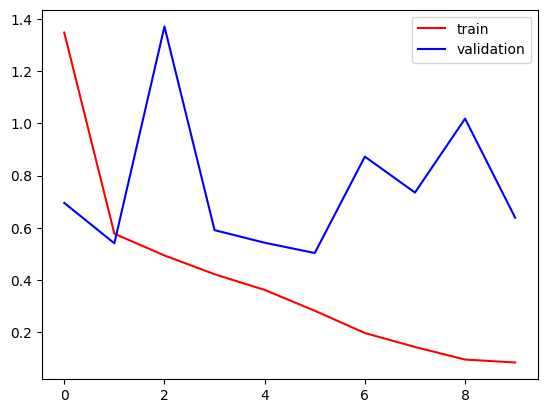

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [33]:
import cv2

In [41]:
test_img = cv2.imread('/content/test/cats/cat.10017.jpg')

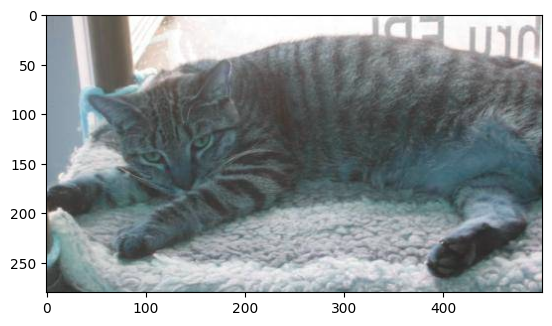

In [42]:
plt.imshow(test_img)

In [43]:
test_img.shape

(280, 500, 3)

In [44]:
test_img=cv2.resize(test_img,(256,256))

In [45]:
test_input=test_img.reshape(1,256,256,3)

In [46]:
model.predict(test_input) # cat = 0, dog = 1

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)